# Evolution Game Theory

In [16]:
import numpy as np
import matplotlib.pyplot as plt

p1 = 0.25   # proportion of Agent 1 in the beginning

# The value are simply set to test the code if it runs
STRATEGY_1 = np.array([[0.25, 0.25, 0.25, 0.25]]).T
STRATEGY_2 = np.array([[0.25, 0.25, 0.25, 0.25]]).T

PAYOFF_1 = np.array([[20, 20, 30, 30],
                     [30, 30, 40, 40],
                     [40, 40, 50, 50],
                     [50, 50, 60, 60]])
PAYOFF_2 = np.array([[20, 30, 20, 30],
                     [40, 50, 40, 50],
                     [30, 40, 30, 40],
                     [50, 60, 50, 60]])


W1 = (STRATEGY_1.T @ PAYOFF_1 @ STRATEGY_1)[0][0]
W2 = (STRATEGY_2.T @ PAYOFF_2 @ STRATEGY_2)[0][0]

print('AVG_PAYOFF_1', W1)
print('AVG_PAYOFF_2', W2)

AVG_PAYOFF_1 40.0
AVG_PAYOFF_2 40.0


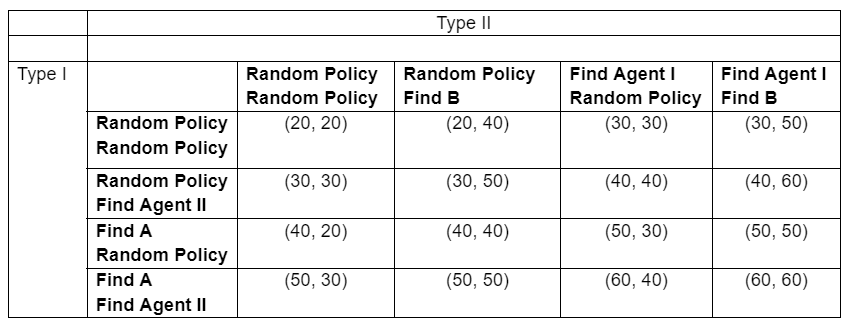

**Type I vs. Type II Agents**

*Type I Agent:* Represents a higher-tier agent, optimized for efficiency and goal accomplishment. It often has the capability to swiftly locate targets and adapt to environmental changes, leading to higher payoff values.

*Type II Agent:* Represents a secondary agent that will achieve similar goals as Type I. While it can accomplish individual tasks, the payoff it gets for each goals will dominated by type I agent's strategy and payoff as it is dependant on type I agent's goal completion. In the presented matrix, we notice that the payoffs of Type II are frequently dominated by those of Type I. This design captures the inherent advantage of Type I agents, emphasizing their significance in completing tasks ahead of their Type II counterparts.

**Random policy** 

When an agent adopts a random policy, their actions lack any specific direction or intent. This randomness means the agent is navigating and making decisions arbitrarily without optimizing for a particular outcome. In the context of the given task, the agent might wander aimlessly, potentially overlooking A, B, or the other agent. As a result, a lot more time might be wasted, and there's no guarantee the agent will successfully complete the desired goals.

**Impact on Payoff**

The randomness inherently reduces efficiency, making tasks more time-consuming and uncertain in terms of outcome. Such a policy is generally associated with lower payoffs, as seen in the matrix. This serves as an implicit discouragement for agents to adopt a random strategy unless strategically necessary.

**Goal Representation**

The matrix cells correspond to scenarios where each agent have two primary goals:

Type I Agent: Find A, Find Agent II
Type II Agent: Find Agent I, Find B


**Payoff Values**

Payoff values in each cell are determined by two main factors:

*Task Completion:* Completing the tasks for example *Find A or B* or *Find Agent I or II* contributes positively to the payoff. However, the exact value depends on the efficiency and accuracy with which the task is completed.

*Time Taken:* Efficiency is key. The faster an agent can accomplish its goals, the higher the payoff. Conversely, taking too long may result in reduced payoffs due to inefficiencies or potential missed opportunities.


**<u> For each task's payoff: </u>**

**For finding A or B:**
For completely Random Policy: +10

For optimal no. of moves to find target: +30

**For finding Agent I or II:**
For completely Random Policy: +10

For Type I Agent doing random policy, Type II Agent actively finding Type I Agent : +20

For Type I Agent actively finding Type II Agent, Type II Agent doing random policy: +20

(In this case fewer moves are needed to complete goal compared to completely random policy but still less optimal than full cooperation.)

For both agents cooperating to find each other for handover: +30

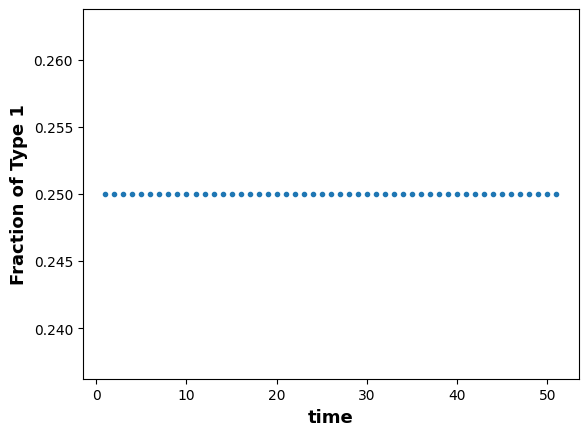

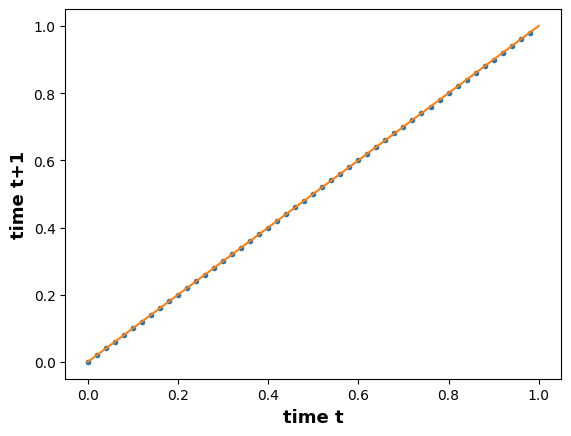

In [17]:
def play_one_gen(p):
    p_nxt_gen = (p * W1) / ((p * W1) + (1 - p)*W2)
    return p_nxt_gen

def play(generation = 50):
    history = [p1]

    for _ in range(generation):
        prev_p1 = history[-1]
        history.append(play_one_gen(prev_p1))

    return history

def plot_fractions(history):
    x = range(1,1+len(history))
    y = history
    fig, ax = plt.subplots()
    ax.set_xlabel('time', fontsize=13,fontweight="bold")
    ax.set_ylabel('Fraction of Type 1', fontsize=13,fontweight="bold")    
    plt.plot(x, y,".")
    plt.show()

def plot_propotion_timestep(time_step = 50):
    x = []
    y = []

    for i in range(time_step):
        p = i/time_step

        x.append(p)
        y.append(play_one_gen(p))

    fig, ax = plt.subplots()
    ax.set_xlabel('time t', fontsize=13,fontweight="bold")
    ax.set_ylabel('time t+1', fontsize=13,fontweight="bold")    
    plt.plot(x, y,".")

    bobo = [0, 1]
    plt.plot(bobo, bobo)

    plt.show()

history = play()
plot_fractions(history)
plot_propotion_timestep()


Let's break down the scenarios:

1. **Both Cooperate (Coop-Coop):** This represents the optimal handover scenario. Both agents are actively working towards a common goal, ensuring a seamless and efficient handover. In the context of the provided matrix, when both Type I and Type II agents choose strategies that aim to find a specific item (e.g., 'Find A' or 'Find B'), they are working cooperatively, leading to the best combined outcome. In terms of payoff, the (60,60) result represents the maximum joint utility, signifying that both agents benefit the most from this collaborative approach.

2. **One Cooperates, One Defects (Coop-Defect or Defect-Coop):** This scenario is sub-optimal. One agent is working towards the common goal while the other is not, resulting in a handover process that is less efficient than when both cooperate. The defector may get a short-term advantage, as seen in some payoffs like (10,20) or (20,10), but this comes at the expense of the overall efficiency. The cooperator gets a lower payoff because their effort isn't reciprocated, making the handover less effective.

3. **Both Defect (Defect-Defect):** This represents the least efficient handover scenario. Neither agent is genuinely working towards a seamless handover, causing possible delays, miscommunications, or missed opportunities. The (1,1) result in the matrix highlights the minimal utility both agents receive when neither is willing to cooperate. Their mutual lack of cooperation harms both their individual and combined outcomes.


**1. Dominant Strategy**

A dominant strategy for a player in a game is one where that strategy is the best one to adopt regardless of what strategy the other players adopt.

For Agent I: From the table, the strategy "Find A, Find Agent 2" consistently provides the highest payoff across all strategies of Agent II, making it the dominant strategy for Agent I.

For Agent II: The strategy "Find Agent 1, Find B" provides the highest payoff when Agent I plays its dominant strategy, making it the dominant strategy for Agent II.

Given the matrix, it can be observed that for every choice of strategy by Type I, there's a better strategy option that yields a higher payoff. This indicates that Type II's choices are being dominated by Type I's strategy.

**2. Pareto Optimal**

The Pareto Optimal outcome is where both agents have the maximum possible payoff without making the other worse. By observing the table, the highest possible payoff for both agents is **(60, 60)**. No other strategy combination provides both agents with a jointly higher payoff. Any deviation from this strategy by any agent results in a reduced payoff for both agents. In this case, it’s when “Find A, Find Agent 2” for Agent 1 and “Find Agent 1, Find B” for Agent 2 is Pareto Optimal. Both agents working together in tandem towards a common goal (both "cooperating") represents the best handover scenario. Their combined efforts result in the maximum joint utility, signifying an efficient handover.

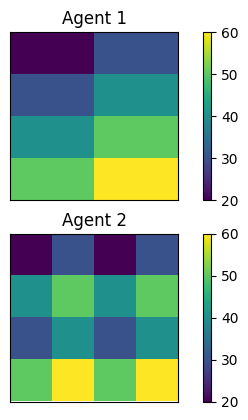

In [20]:
import matplotlib.pyplot as plt

p1 = plt.subplot(2, 1, 1)
a = [[20, 20, 30, 30],
     [30, 30, 40, 40],
     [40, 40, 50, 50],
     [50, 50, 60, 60]]
plt.title('Agent 1')
plt.imshow(a)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar()


plt.subplot(2, 1, 2 )
a = [[20, 30, 20, 30],
     [40, 50, 40, 50],
     [30, 40, 30, 40],
     [50, 60, 50, 60]]
plt.title('Agent 2')
plt.imshow(a)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar()

plt.show()

**3. Nash Equilibrium**

A Nash equilibrium is a situation where neither player has an incentive to deviate from their chosen strategy given the choice of the other player.

<u>*Pure Strategy Nash Equilibrium:*</u>
The combination where Agent I chooses "Find A, Find Agent 2" and Agent II chooses "Find Agent 1, Find B" is a Nash Equilibrium. If Agent I is playing "Find A, Find Agent 2", Agent II's best response is "Find Agent 1, Find B". And if Agent II is playing "Find Agent 1, Find B", Agent I's best response is "Find A, Find Agent 2". Neither has an incentive to deviate unilaterally.


<u>*Mixed Strategy Nash Equilibrium:*</u>
Finding a mixed-strategy Nash equilibrium can be more complex, as it involves players randomizing over their strategies. Given that there are pure dominant strategies for both players, they will always prefer their dominant strategy over any mixed strategy. Hence, there is no mixed-strategy Nash equilibrium in this game.




Given the above, it's reasonable to expect convergence towards the strategies that are Nash Equilibrium, especially the Pareto optimal one, as both agents optimize their rewards. So, the system should converge on the strategy combination "Find A, Find Agent 2" for Agent I and "Find Agent 1, Find B" for Agent II. 

In summary, both game-theoretical analysis and the payoff matrix indicate that the best course of action for both agents is to focus on their specialized tasks and cooperate to seek each other for the handover before delivering to point B.


# Evolution Stability

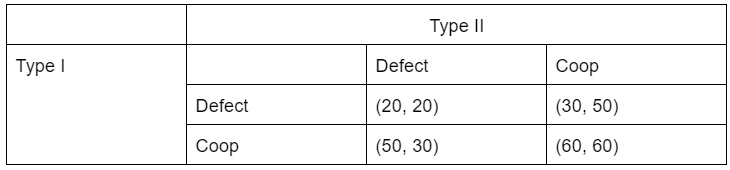

1. **Defect, Defect (Both act randomly):**
Looking at the first matrix, when both adopt the "Random Policy, Random Policy" strategy, we get the payoff (20, 20). This represents mutual defection, where neither agent benefits significantly.

2. **Defect, Coop (Type I defects while Type II cooperates):**
The closest representation for Type I defecting and Type II cooperating in the first matrix would be "Random Policy, Random Policy" for Type I and "Find Agent I, Find B" for Type II. The payoff for such strategies is (30, 50). 

3. **Coop, Defect (Type I cooperates while Type II defects):**
Now, the opposite, where Type I adopts "Find A, Find Agent II" and Type II goes with "Random Policy, Random Policy". As established above, the payoff is (50, 30).

4. **Coop, Coop (Both cooperate):**
This can be directly taken as Type I adopting "Find A, Find Agent II" and Type II adopting "Find Agent I, Find B", which results in the payoff (60, 60).

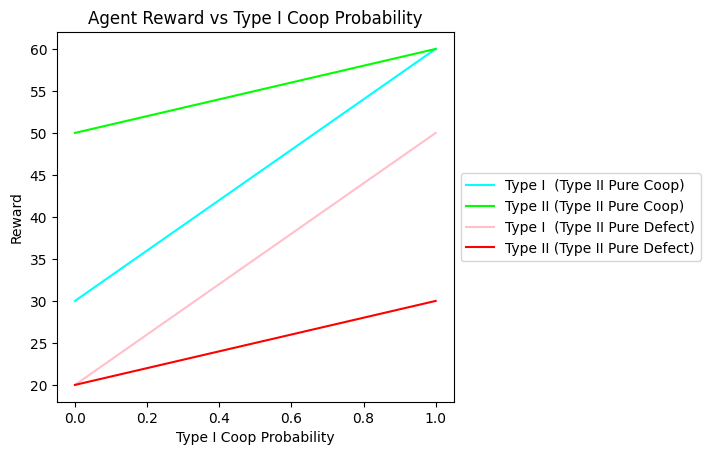

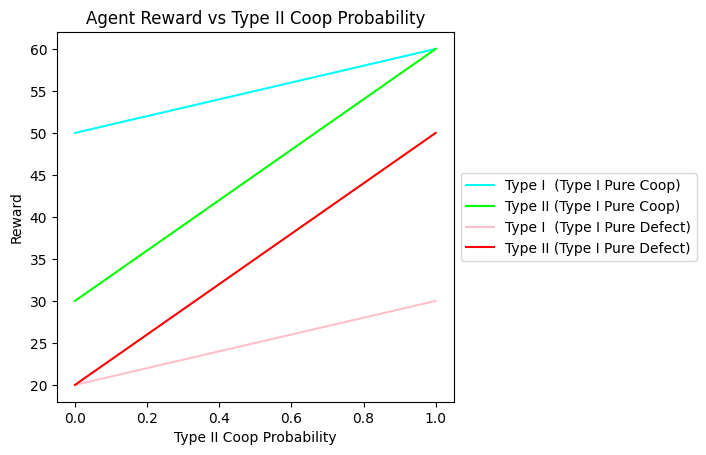

In [26]:
import numpy as np
import matplotlib.pyplot as plt

PAYOFF_1S = np.array([[20, 30],
                      [50, 60]])
PAYOFF_2S = np.array([[20, 50],
                      [30, 60]])

def plot_evo_stability(payoff_1, payoff_2, type=1):
    """
        Observe the evolution stability between 2 population.

    Args:
        payoff1: Payoff matrix for Type 1.
        payoff2: Payoff matrix for Type 2.
        type: Population type that exercise mixed strategy.
    """
    fig = plt.figure()
    ax  = plt.subplot(111)

    x_axis = [0, 1]

    if type == 1:
        ax.plot(x_axis, [payoff_1[0][1], payoff_1[1][1]], label = 'Type I  (Type II Pure Coop)', color = 'cyan')
        ax.plot(x_axis, [payoff_2[0][1], payoff_2[1][1]], label = 'Type II (Type II Pure Coop)', color = 'lime')
        ax.plot(x_axis, [payoff_1[0][0], payoff_1[1][0]], label = 'Type I  (Type II Pure Defect)', color = 'pink')
        ax.plot(x_axis, [payoff_2[0][0], payoff_2[1][0]], label = 'Type II (Type II Pure Defect)', color = 'red')

        plt.xlabel('Type I Coop Probability')
        plt.title('Agent Reward vs Type I Coop Probability')
    elif type == 2:
        ax.plot(x_axis, [payoff_1[1][0], payoff_1[1][1]], label = 'Type I  (Type I Pure Coop)', color = 'cyan')
        ax.plot(x_axis, [payoff_2[1][0], payoff_2[1][1]], label = 'Type II (Type I Pure Coop)', color = 'lime')
        ax.plot(x_axis, [payoff_1[0][0], payoff_1[0][1]], label = 'Type I  (Type I Pure Defect)', color = 'pink')
        ax.plot(x_axis, [payoff_2[0][0], payoff_2[0][1]], label = 'Type II (Type I Pure Defect)', color = 'red')

        plt.xlabel('Type II Coop Probability')
        plt.title('Agent Reward vs Type II Coop Probability')

    plt.ylabel('Reward')


    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


plot_evo_stability(PAYOFF_1S, PAYOFF_2S, type=1)
plot_evo_stability(PAYOFF_1S, PAYOFF_2S, type=2)


The first graph depicts the rewards for both Type I and Type II agents based on the probability of Type I cooperating (ranging from 0, meaning never cooperates, to 1, meaning always cooperates). The graph showcases four lines:

1. Reward for Type I when Type II purely cooperates.

2. Reward for Type II when Type II purely cooperates.

3. Reward for Type I when Type II purely defects.

4. Reward for Type II when Type II purely defects.

The second graph depicts the rewards for both Type I and Type II agents based on the probability of Type II cooperating (ranging from 0, meaning never cooperates, to 1, meaning always cooperates). The graph showcases four lines:

1. Reward for Type I when Type I purely cooperates.

2. Reward for Type II when Type I purely cooperates.

3. Reward for Type I when Type I purely defects.

4. Reward for Type II when Type I purely defects.

From the matrix and reward, we can deduce the following:

1.  **<u> Dominant Strategy Analysis: </u>**

**For Type I:**

if Type II defects, Type I gets a payoff of 20 by defecting and 50 by cooperating. Therefore, cooperating is better.
If Type II cooperates, Type I gets a payoff of 30 by defecting and 60 by cooperating. Again, cooperating is better.
So, Type I has a dominant strategy to cooperate.

**For Type II:**

If Type I defects, Type II gets a payoff of 20 by defecting and 50 by cooperating. Therefore, cooperating is better.
If Type I cooperates, Type II gets a payoff of 30 by defecting and 60 by cooperating. Again, cooperating is better.
So, Type II also has a dominant strategy to cooperate.

2. **<u> Pareto Optimal: </u>**

The outcome where both agents cooperate and get (60, 60) is Pareto optimal. This is because no other outcome in the matrix gives both agents a higher or equivalent payoff without making at least one of them worse off.

3. **<u> Nash Equilibrium: </u>**

- **Pure Strategy Nash Equilibrium Analysis:** Since both Type I and Type II have dominant strategies to cooperate, the outcome (60, 60) where both cooperate is a Pure Nash Equilibrium. Here, neither Type I nor Type II would want to change their strategy of cooperating, as defecting would reduce their payoff.

- **Mixed Strategy Nash Equilibrium Analysis:** For mixed strategy Nash equilibrium, players randomize their strategies such that they are indifferent between their available actions.

To summarize, both Type I and Type II have a dominant strategy to Cooperate. The outcome where both cooperate (60, 60) is both Pareto Optimal and a Nash Equilibrium. This suggests that in this game, mutual cooperation is the most favourable and stable outcome for both players.

# Replicator Dynamics

#### Population Payoff

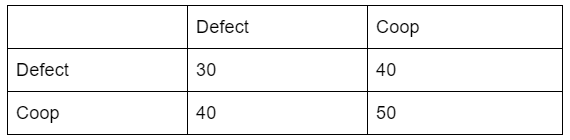

To get a 2x2 population payoff matrix from the given 4x4 matrix, we'll calculate the average payoff for each combination of the aggregated strategies for Type I and Type II.


1. Combine "Random Policy, Random Policy" of Type I and "Random Policy, Random Policy" and Type II into one aggregated strategy we can call "Defect & Defect".

2. Combine "Find A, Random Policy" and "Random Policy, Find Agent II" of Type I into another aggregated strategy we can call "Defect & Coop"

3. Combine "Random Policy, Find B" and "Find Agent I, Random Policy" of Type II into another aggregated strategy we can call "Coop & Defect".

4. Combine "Find A, Find Agent II" of Type I and "Find Agent I, Find B" of Type II into another aggregated strategy we can call "Coop & Coop".

**Defect & Defect:**

$(20+20)/2 = 20$

$(20+40)/2 = 30$

$(30+30)/2 = 30$

$(30+50)/2 = 40$

Average: $(20+30+30+40)/2 = 30$

**Defect & Coop:**

$(40+20)/2 = 30$

$(40+40)/2 = 40$

$(50+30)/2 = 40$

$(50+50)/2 = 50$

Average: $(30+40+40+50)/2 = 40$

**Coop & Defect:**

$(30+30)/2 = 30$

$(30+50)/2 = 40$

$(40+40)/2 = 40$

$(40+60)/2 = 50$

Average: $(30+40+40+50)/2 = 40$

**Coop & Coop:**

$(50+30)/2 = 40$

$(50+50)/2 = 50$

$(60+40)/2 = 50$

$(60+60)/2 = 60$

Average: $(40+50+50+60)/2 = 50$

#### Action Payoff

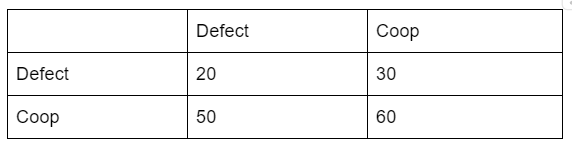

From the Evolution Stability payoff matrix, we can get the action payoff for both agent types as follows. (Type I and Type II Agent have the same payoff)

Defect & Defect: 20

Defect & Coop: 30

Coop & Defect: 50

Coop & Coop: 60

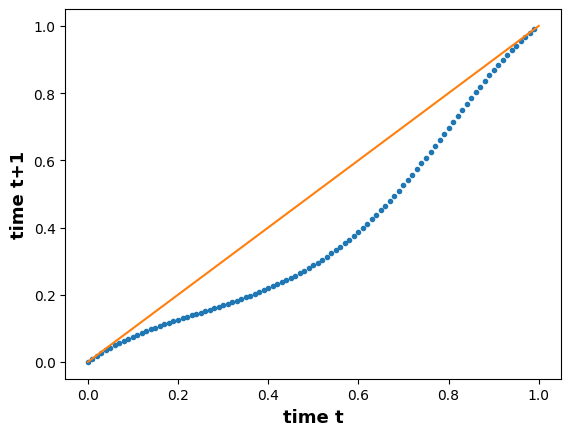

In [25]:
POPULATION_PAYOFF = np.array([[30, 40],  # For Type 1 & Type 2
                              [40, 50]])

ACTION_PAYOFF = np.array([[20, 30], # For Defect & Coop
                          [50, 60]])
LEARN_RATE = 0.17

def play_one_gen(p, A):
    x = np.array([[p, 1-p]]).T
    # Week 7 Population Game - Slide 40 - Replicator Equation
    x_1 = x[0][0]*((A@x)[0][0] - (x.T @ A @ x)[0][0])
    x_2 = x[1][0]*((A@x)[1][0] - (x.T @ A @ x)[0][0])

    # According to slides xi_1 & xi_2 are rate of change over time, I look at the value but they don't make sense to me
    # You can print out to see the value
    # print(xi_1, xi_2)

    x1_nxt_round_p = p*(1+x_1*LEARN_RATE)              # I set learning rate to 0.17, somehow the graphs looks fine  
    x2_nxt_round_p = (1-p)*(1+x_2*LEARN_RATE)

    res = x1_nxt_round_p/(x1_nxt_round_p + x2_nxt_round_p)

    return res


def plot_propotion_timestep(A, time_step = 100):
    x = []
    y = []

    for i in range(time_step):
        p = i/time_step

        x.append(p)        # p = Proportion of Type 1 (A) / Probability to Defect (B) 
        y.append(play_one_gen(p, A))

    fig, ax = plt.subplots()
    ax.set_xlabel('time t', fontsize=13,fontweight="bold")
    ax.set_ylabel('time t+1', fontsize=13,fontweight="bold")    
    plt.plot(x, y,".")

    bobo = [0, 1]
    plt.plot(bobo, bobo)
    # plt.axvline(x=A[0][1]/np.sum(A), color='red', linestyle='--')
    # plt.axhline(y=A[0][1]/np.sum(A), color='red', linestyle='--')


    plt.show()

# history = play()
# plot_fractions(history)
plot_propotion_timestep(POPULATION_PAYOFF)


**Adaptive Behavior:**

The dynamics portrayed by the blue dots reveal an adaptive behavior in the population. Depending on which strategy or type has a higher relative payoff, the population shifts its proportions to increase the prevalence of the more successful strategy or type.


**Stability and Instability Regions:**

Areas where the blue dots closely follow the orange line are regions of stability. Small changes in proportions lead to minimal shifts in the next generation.
In contrast, regions where the blue dots deviate significantly from the orange line are unstable. Here, even slight changes in proportions can result in significant shifts in the next generation.


**Sensitivity to Initial Proportions:**

The graph suggests sensitivity to initial conditions. Starting with a specific proportion of Type I can lead the population down different trajectories over time.

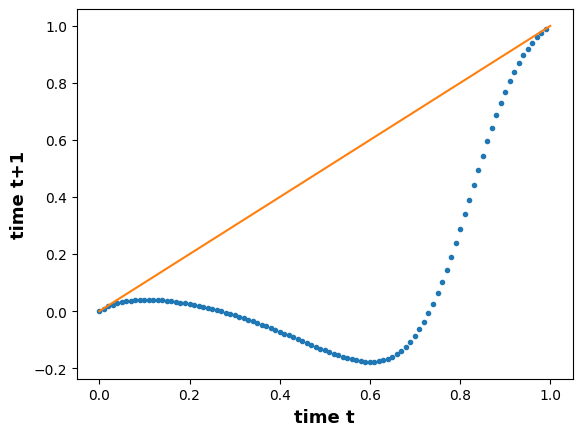

In [24]:
plot_propotion_timestep(ACTION_PAYOFF)

"Coop" is performing better than the average performance of all strategies in the population, the proportion of "Coop" strategies in the population is increasing over time.

For an agent meeting a defector: Cooperating (10) yields a higher payoff than defecting (-20). Thus, based on this, if many agents in the population are defecting, there's an incentive for an agent to cooperate.

For an agent meeting a cooperator: Cooperating (20) yields a higher payoff than defecting (10). This reinforces the notion that cooperation is beneficial.

1. **Stable States & Convergence:**
The curve is below $y=x$ and will converge to $p=0$ in the replicator dynamics graph, it means the population will ultimately adopt the "Coop" strategy.
Given our matrix, this makes sense. "Coop" has a higher payoff against both defectors and cooperators compared to "Defect." So, over time, as agents adjust their strategies based on the payoffs they observe, the proportion of "Coop" strategies in the population should increase. If everyone starts by defecting, and some random mutations or changes cause some individuals to switch to cooperating, those cooperators would fare better on average than the defectors. Over time, this would cause the proportion of cooperators to increase.

2. **Equilibrium:**
An equilibrium in the context of replicator dynamics is a state where the proportions of strategies in the population do not change. This could be because one strategy completely dominates (like "Coop" in our case) or because there's a stable mix of strategies. In the given matrix, the dynamics push the population towards mutual cooperation. So, even though "Defect, Defect" is a Nash Equilibrium, it's not stable in the face of the replicator dynamics if there's any deviation or change. "Coop, Coop" is both a Nash Equilibrium and would be a stable state in the replicator dynamics, given the payoffs.

In conclusion, the replicator dynamics based on this payoff matrix suggest that cooperation will be the dominant strategy in the long run, despite the presence of a "Defect, Defect" Nash Equilibrium. This is because cooperation offers higher rewards for players compared to defecting, regardless of the opponent's strategy.

## Question 4: Replicator Simulation

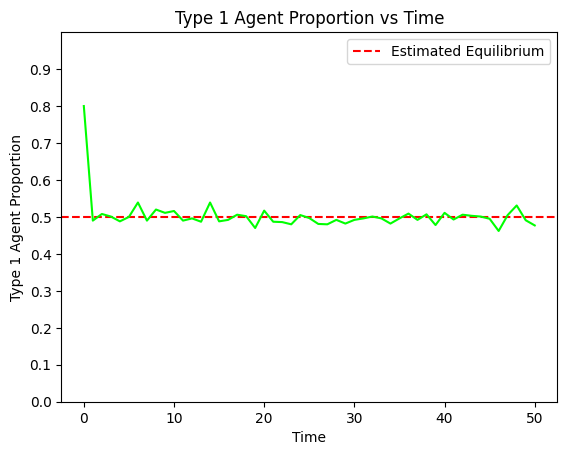

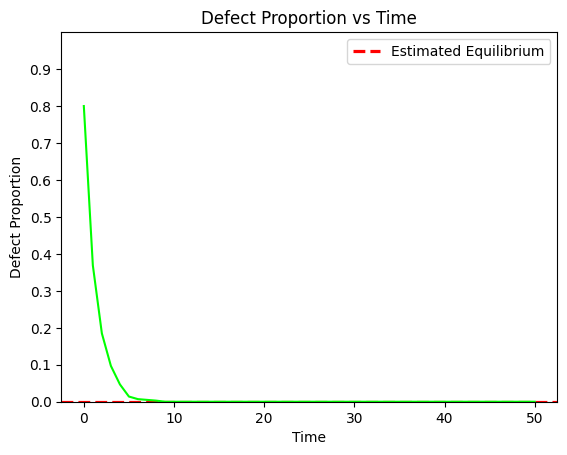

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

POPULATION_SIZE = 1000
GAME_SIZE = 200
ITERATION = 50
POPULATION_PAYOFF = np.array([[0, 1],  # For Type 1 & Type 2
                              [1, 0]])
ACTION_PAYOFF = np.array([[0, 10], # For Defect & Coop
                          [10, 20]])

def play_game(population, payoff):
    """
        The population play the playoff game for a evolution.  
        It estimates the payoff for each type.

    Args:
        population: The population, 1 for type 1, 0 for type 2.
        payoff: Payoff matrix.
    """
    p1 = sum(population)/len(population)  # Type 1 Proportion
    p2 = 1 - p1                           # Type 2 Proportion

    x = np.array([[p1, p2]]).T
    x_1 = (payoff@x)[0][0]   # Type 1 Avg Payoff 
    x_2 = (payoff@x)[1][0]   # Type 2 Avg Payoff

    payoff_1 = x_1/(x_1 + x_2)  # Ratio of x_1 in Total Payoff 
    payoff_2 = x_2/(x_1 + x_2)  # Ratio of x_2 in Total Payoff 

    payoffs = np.where(population==1,payoff_1,payoff_2)

    return payoffs


def one_round(population, payoff):
    """
        The population are splitted into few groups, each group plays the playoff game for an iteration. 
        Next, the population evolve for next generation.

    Args:
        population: The population, 1 for type 1, 0 for type 2.
        payoff: Payoff matrix.
    """
    np.random.shuffle(population)

    all_games   = np.split(population, POPULATION_SIZE/GAME_SIZE)                  # Split a Population into Multiple Games            
    all_payoffs = np.array([play_game(game, payoff) for game in all_games]).flatten()   # Play the Games
    indices = np.random.choice(np.arange(0,POPULATION_SIZE),POPULATION_SIZE,       # Select Type for Next Round
                               replace=True,
                               p=all_payoffs/np.sum(all_payoffs))
    parents = np.array([population[i] for i in indices])
    
    return parents

def play(p, payoff, iteration = ITERATION):
    """
        This function plays a playoff game on a population, the observe the proportion of the population. 

    Args:
        population: The population, 1 for type 1, 0 for type 2.
        payoff: Payoff matrix.
    """
    size_1 = int(POPULATION_SIZE*p)      # Type 1 size, represented with 1.
    size_2 = POPULATION_SIZE - size_1    # Type 2 size, represented with 0.
    population = np.array([1] * size_1 + [0] * size_2)

    his = [p]       # History of Type 1 Proportion

    for _ in range(iteration):
        population = one_round(population, payoff)
        his.append(sum(population)/POPULATION_SIZE)

    return his


def plot_agent_type(p, payoff):
    """
        Plot the evolution dynamics graph for agent type.

    Args:
        p : Probability of type 1 population.
        payoff: Payoff matrix.
    """
    y = play(p, payoff)
    x = [i for i in range(ITERATION+1)]

    plt.clf()

    plt.title('Type 1 Agent Proportion vs Time')
    plt.axhline(0.5, linestyle='--', color='red', label = 'Estimated Equilibrium')

    plt.xlabel('Time')
    plt.ylabel('Type 1 Agent Proportion')
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.ylim([0, 1])

    plt.plot(x, y, color='lime')
    plt.legend()
    plt.show()

def plot_action_type(p, payoff):
    """
        Plot the evolution dynamics graph for action type.

    Args:
        p : Probability of type 1 population.
        payoff: Payoff matrix.
    """
    y = play(p, payoff)
    x = [i for i in range(ITERATION+1)]

    plt.title('Defect Proportion vs Time')
    plt.axhline(0, linestyle='--', color='red', linewidth = 2.3, label = 'Estimated Equilibrium')
    plt.xlabel('Time')
    plt.ylabel('Defect Proportion')
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.ylim([0, 1])

    plt.plot(x, y, color='lime')
    plt.legend()
    plt.show()

plot_agent_type(0.8, POPULATION_PAYOFF)
plot_action_type(0.8, ACTION_PAYOFF)
